In [226]:
#main new file
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
trial_data_complete = pd.merge(mouse_data, clinical_data, how="left", on="Mouse ID")

# Display the data table for preview
trial_data_complete.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [227]:
#Tumor Response to Treatment
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
MeanTrialData = trial_data_complete.groupby(['Drug','Timepoint'],as_index=False).mean()
#MeanTrialData = trial_data_complete.groupby(['Drug','Timepoint']).mean()
MeanTrialData.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [228]:
#SemTrialData = trial_data_complete.groupby(['Drug','Timepoint']).sem()
SemTrialData.head()

Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731

In [229]:
MeanTumorVolume = pd.pivot_table(MeanTrialData, index=['Timepoint'], values='Tumor Volume (mm3)', columns=['Drug'])
MeanTumorVolume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [230]:
semTumorVolume = pd.pivot_table(SemTrialData, index=['Timepoint'], values='Tumor Volume (mm3)', columns=['Drug'])
semTumorVolume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


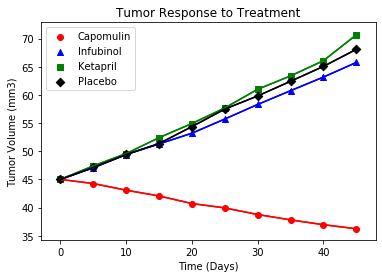

In [239]:
#scatter plot
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
colors = ("red", "blue","green", "black")
markers = ("o","^","s","D")
drugs = ("Capomulin","Infubinol","Ketapril", "Placebo" )

for drug, mycolor,mymarker in zip(drugs,colors,markers):
    plt.scatter(MeanTumorVolume.index,MeanTumorVolume[drug],color=mycolor,label=drug,marker=mymarker)
    plt.plot(MeanTumorVolume.index,MeanTumorVolume[drug],color=mycolor)
    plt.errorbar(MeanTumorVolume.index,MeanTumorVolume[drug],semTumorVolume[drug],color=mycolor)
 
plt.legend(loc=2)
plt.savefig('figure_1_MeanTumorVolume.pdf', dpi=300)  
plt.show()

In [236]:
#Metastatic Response to Treatment
# Store the Metastatic Volume Data Grouped by Drug and Timepoint 
meanMetastaticSites = pd.pivot_table(MeanTrialData, index=['Timepoint'], values='Metastatic Sites', columns=['Drug'])

#groupedTrialData =  trial_data_complete.groupby(['Drug','Timepoint'],as_index=False)
#MetastaticSites = groupedTrialData['Metastatic Sites'].mean()

# Preview DataFrame
meanMetastaticSites.head()                      

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [237]:
semMetastaticSites = pd.pivot_table(SemTrialData, index=['Timepoint'], values='Metastatic Sites', columns=['Drug'])
semMetastaticSites
#MySemStat = groupedTrialData['Metastatic Sites'].sem()
#MySemStat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


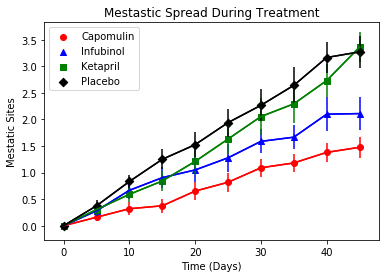

In [240]:
#scatter plot
plt.xlabel("Time (Days)")
plt.ylabel("Mestatic Sites")
plt.title("Mestastic Spread During Treatment")
colors = ("red", "blue","green", "black")
markers = ("o","^","s","D")
drugs = ("Capomulin","Infubinol","Ketapril", "Placebo" )

for drug, mycolor,mymarker in zip(drugs,colors,markers):
    plt.scatter(meanMetastaticSites.index,meanMetastaticSites[drug],color=mycolor,label=drug,marker=mymarker)
    plt.plot(meanMetastaticSites.index,meanMetastaticSites[drug],color=mycolor)
    plt.errorbar(meanMetastaticSites.index,meanMetastaticSites[drug],semMetastaticSites[drug],color=mycolor)
 
plt.legend(loc=2)
plt.savefig('figure_2_Metastatic Sites.pdf', dpi=300)  
plt.show()

In [ ]:
#Survival Rates

In [241]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
MiceCount = groupedTrialData['Mouse ID'].count()

# Preview DataFrame
MiceCount.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [242]:
MiceCountPvt = pd.pivot_table(MiceCount, index=['Timepoint'], values='Mouse ID', columns=['Drug'])
MiceCountPvt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


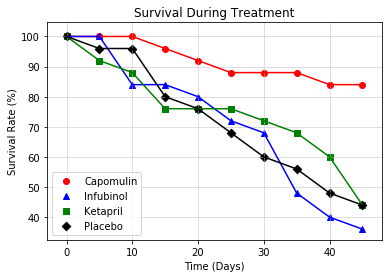

In [250]:
#scatter plot
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
colors = ("red", "blue","green", "black")
markers = ("o","^","s","D")
drugs = ("Capomulin","Infubinol","Ketapril", "Placebo" )

for drug, mycolor,mymarker in zip(drugs,colors,markers):
    plt.scatter(MiceCountPvt.index,100*MiceCountPvt[drug]/25,color=mycolor,label=drug,marker=mymarker)
    plt.plot(MiceCountPvt.index,100*MiceCountPvt[drug]/25,color=mycolor)
    plt.grid(which='major', axis='both',color='0.75', linestyle='-', linewidth=0.5)
    
    
plt.legend(loc=3)
plt.savefig('figure_3_MouseSurvivalRate.pdf', dpi=300)  
plt.show()

In [298]:
PercentChange = (100*(MeanTumorVolume.iloc[-1]-MeanTumorVolume.iloc[0])/MeanTumorVolume.iloc[0])

In [335]:
myAnalysis = pd.DataFrame({"Tumor % Change": PercentChange})
myAnalysis

,Tumor % Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [316]:
drugs = ("Capomulin","Infubinol","Ketapril", "Placebo" )

myAnalysis.drop(["Ceftamin","Naftisol","Propriva","Ramicane","Stelasyn","Zoniferol"])

,Tumor % Change
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


In [337]:
myTumorChange = myAnalysis.apply(tuple, axis=0)
print(myTumorChange)

Tumor % Change    (-19.475302667894173, 42.51649185589744, 46.12...
dtype: object


In [338]:
mydrugChanges = (-19.475303,46.123472,57.028796,51.297960)
mydrugChanges

(-19.475303, 46.123472, 57.028796, 51.29796)

In [342]:
drugs = ("Capomulin","Infubinol","Ketapril", "Placebo" )
x_axis = len(drugs)
y_axis = mydrugTypes

<BarContainer object of 4 artists>

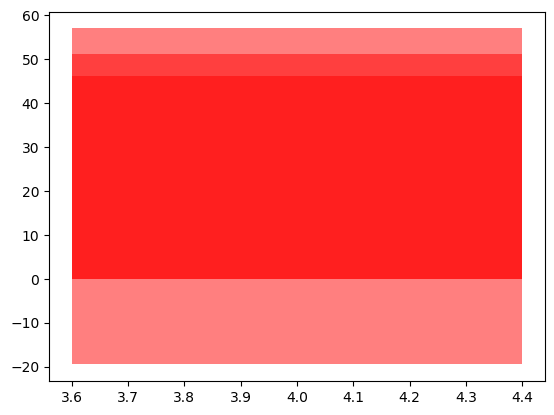

In [343]:
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")